In [1]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /home/faulty/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import accuracy_score,classification_report 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from xgboost import XGBClassifier

In [3]:
from wordcloud import WordCloud 
from sklearn.svm import SVC


In [4]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [5]:
X = df['Text']
y = df['Category']
print(X.sample())
print(y.sample())

1232    windows worm travels with tetris users are bei...
Name: Text, dtype: object
257    tech
Name: Category, dtype: object


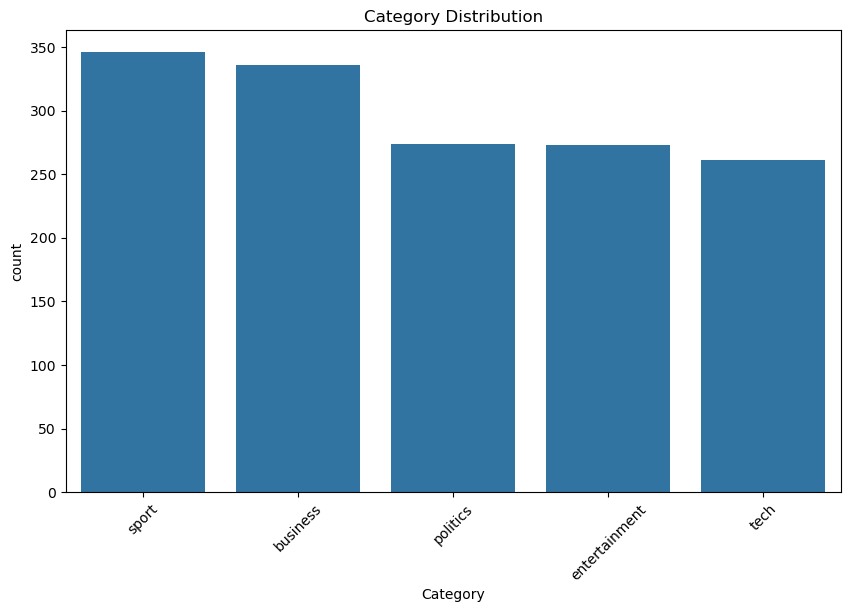

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'Category',order=df['Category'].value_counts().index)
plt.xticks(rotation=45) 
plt.title("Category Distribution")
plt.show() 

In [7]:
print(df['Category']) 

0            business
1            business
2            business
3                tech
4            business
            ...      
1485    entertainment
1486    entertainment
1487         business
1488             tech
1489             tech
Name: Category, Length: 1490, dtype: object


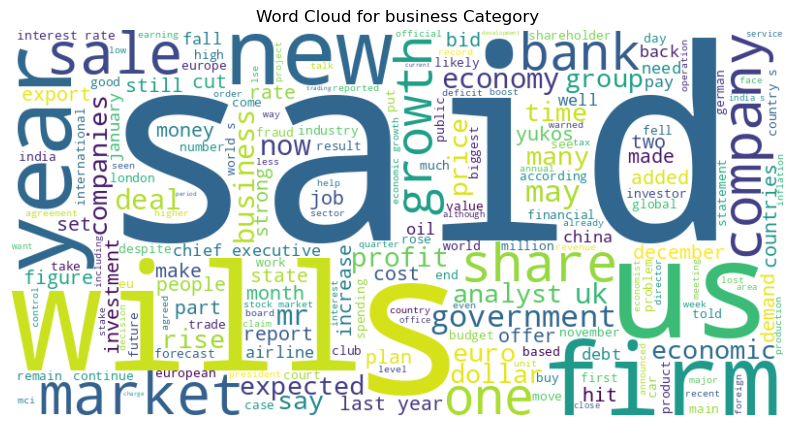

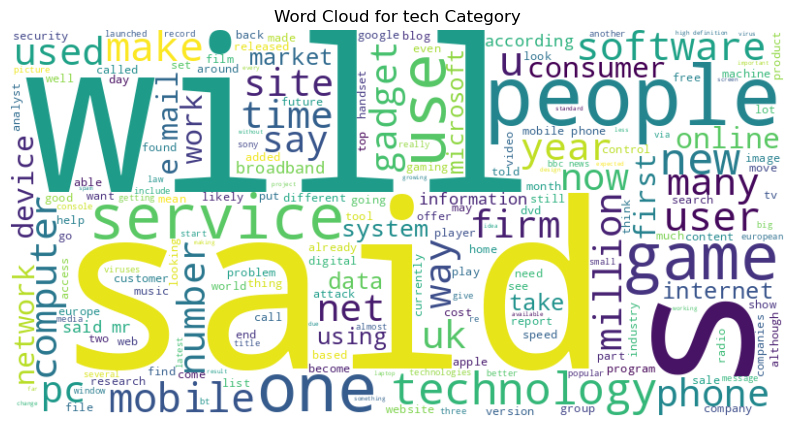

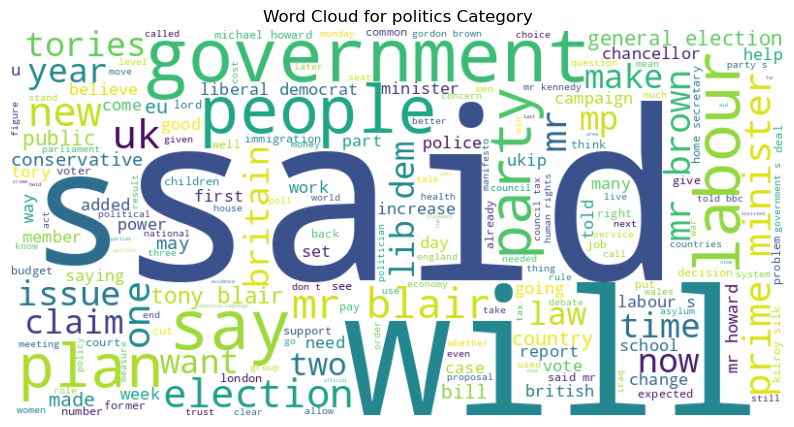

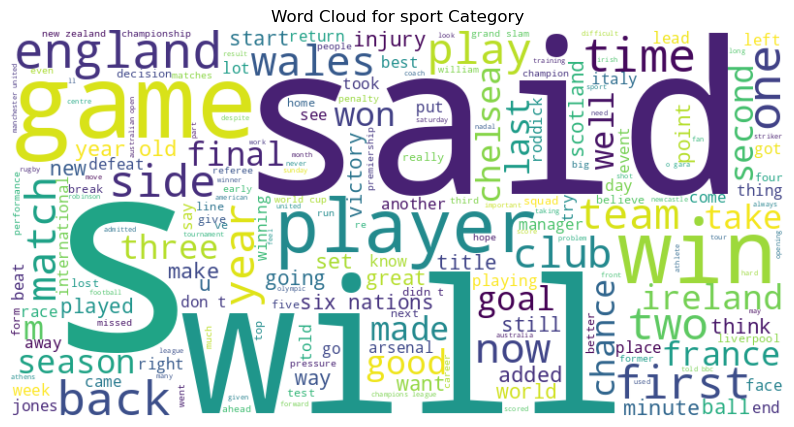

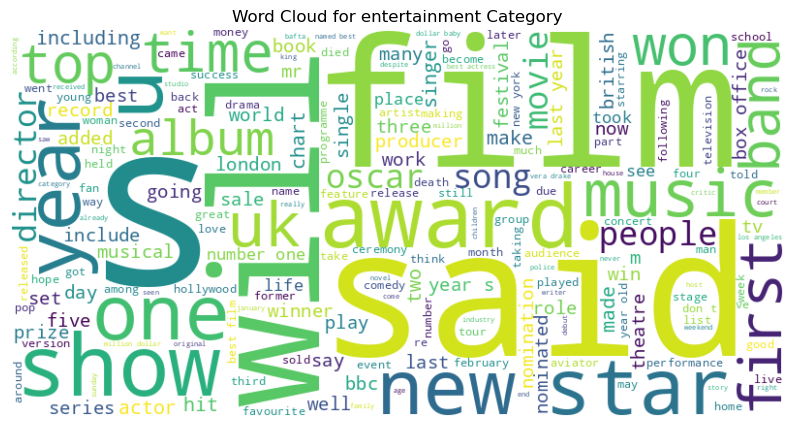

In [8]:

for category in df['Category'].unique():
    text = " ".join(df[df["Category"] == category]["Text"].values)
    wordcloud = WordCloud( 
        width= 800, 
        height=400, 
        background_color="white" 
    ).generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(f"Word Cloud for {category} Category")
    plt.axis("off") 
    plt.show()
    
    
    

In [9]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [11]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-z\s]','',text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

print("Hello, Welcome to my world@@@, 1234!") 
print(preprocess_text("Hello, I'm eating to my world@@@, 1234!")) 

Hello, Welcome to my world@@@, 1234!
hello im eating world


In [12]:
df['Text'] = df['Text'].apply(preprocess_text)

In [13]:
X_train,X_test, y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)


In [15]:
lr_model = make_pipeline(TfidfVectorizer(stop_words='english'), LogisticRegression())
lr_model.fit(X_train,y_train) 
y_pred_lr = lr_model.predict(X_test) 

In [16]:
print("Accuracy = ",accuracy_score(y_test,y_pred_lr))
print (classification_report(y_test,y_pred_lr))

Accuracy =  0.9664429530201343
               precision    recall  f1-score   support

     business       0.92      0.97      0.95        75
entertainment       1.00      1.00      1.00        46
     politics       0.96      0.95      0.95        56
        sport       0.98      1.00      0.99        63
         tech       0.98      0.91      0.95        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



In [23]:
new_texts = [
    "The latest football match ended in a draw, with great performance from both the teams", 
"The government policies will help with hydropower"]

new_predictions = lr_model.predict(new_texts) 
for text,prediction in zip(new_texts, new_predictions): 
    print(f"Text: {text} \n Predicted Category: {prediction}")

Text: The latest football match ended in a draw, with great performance from both the teams 
 Predicted Category: sport
Text: The government policies will help with hydropower 
 Predicted Category: politics


In [24]:
import joblib
joblib.dump(lr_model,"news_classifier.gz")

['news_classifier.gz']